In [21]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import patsy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [22]:
bodyLotionC = pd.read_csv("bodyLotionC.csv",header=None,names=["tau","eta_e"])

In [23]:
bodyLotionC

,tau,eta_e
0,1.061,9321.803
1,1.257,10354.381
2,1.593,9805.602
3,1.885,9993.431
4,2.184,9889.684
5,2.557,9787.014
6,2.994,9787.014
7,3.418,9386.883
8,4.017,8303.630
9,5.016,7583.383


In [24]:
bodyLotionC["gammaDot"]=bodyLotionC["tau"]/bodyLotionC["eta_e"]

In [25]:
bodyLotionC

,tau,eta_e,gammaDot
0,1.061,9321.803,0.000114
1,1.257,10354.381,0.000121
2,1.593,9805.602,0.000162
3,1.885,9993.431,0.000189
4,2.184,9889.684,0.000221
5,2.557,9787.014,0.000261
6,2.994,9787.014,0.000306
7,3.418,9386.883,0.000364
8,4.017,8303.630,0.000484
9,5.016,7583.383,0.000661


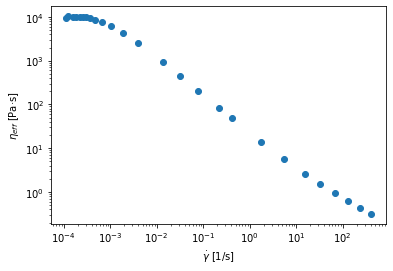

In [35]:
fig,ac = plt.subplots()
ac.loglog()
ac.set_xlabel(r'$\dot{\gamma}$ [1/s]')
ac.set_ylabel(r'$\eta_{eff}$ [Pa·s]')
ac.scatter(bodyLotionC["gammaDot"],bodyLotionC["eta_e"])

In [38]:
bodyLotionC["log_eta_e"] = np.log(bodyLotionC["eta_e"])
bodyLotionC["log_gammaDot"] = np.log(bodyLotionC["gammaDot"])
bodyLotionC

,tau,eta_e,gammaDot,log_eta_e,log_gammaDot
0,1.061,9321.803,0.000114,9.140111,-9.080899
1,1.257,10354.381,0.000121,9.245165,-9.016437
2,1.593,9805.602,0.000162,9.190709,-8.725090
3,1.885,9993.431,0.000189,9.209683,-8.575755
4,2.184,9889.684,0.000221,9.199247,-8.418089
5,2.557,9787.014,0.000261,9.188812,-8.249977
6,2.994,9787.014,0.000306,9.188812,-8.092201
7,3.418,9386.883,0.000364,9.147069,-7.918013
8,4.017,8303.630,0.000484,9.024448,-7.633913
9,5.016,7583.383,0.000661,8.933715,-7.321082


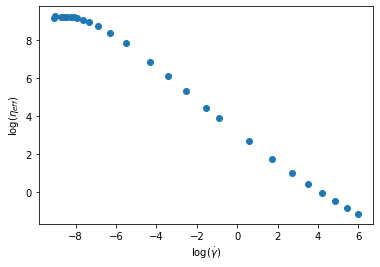

In [40]:
fig,ac = plt.subplots()
ac.set_xlabel(r'$\log(\dot{\gamma})$')
ac.set_ylabel(r'$\log(\eta_{eff})$')
ac.scatter(bodyLotionC["log_gammaDot"],bodyLotionC["log_eta_e"])

In [41]:
PLmodel = smf.ols('np.log(eta_e)~np.log(gammaDot)',bodyLotionC)

In [43]:
PLResult = PLmodel.fit()

In [44]:
PLResult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(eta_e)   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     3249.
Date:                Mon, 22 Feb 2021   Prob (F-statistic):           3.90e-27
Time:                        15:45:59   Log-Likelihood:                -7.9554
No. Observations:                  26   AIC:                             19.91
Df Residuals:                      24   BIC:                             22.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.1970      0.079     40.267      0.000       3.033       3.361
np.log(gammaDot)    -0.7373      0.013    -57.003      0.000      -0.764      -0.711
==============================================================================
Omnibus:                        0.263   Durbin-Watson:                   0.094
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.344
Skew:                          -0.208   Prob(JB):                        0.842
Kurtosis:                       2.619   Cond. No.                         7.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
K = np.exp(PLResult.params[0])
n = PLResult.params[1]+1

In [50]:
K

24.459127902648824

In [51]:
n

0.26269929651676516

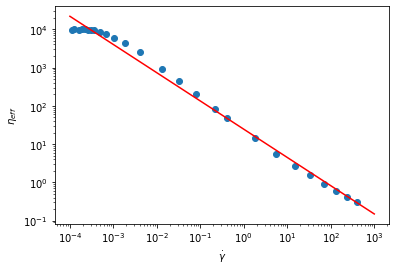

In [60]:
gammaDot_plot = np.logspace(-4,3,250)
eta_e_plot = K*np.power(gammaDot_plot,n-1)
fig,ac = plt.subplots()
ac.loglog()
ac.set_xlabel(r'$\dot{\gamma}$')
ac.set_ylabel(r'$\eta_{eff}$')
ac.scatter(bodyLotionC["gammaDot"],bodyLotionC["eta_e"])
ac.plot(gammaDot_plot,eta_e_plot,color="red")

In [55]:
1e-4

0.0001